In [1]:
import numpy as np

import pandas as pd

import cv2

import matplotlib.pyplot as plt

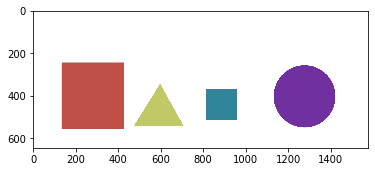

In [2]:
image = cv2.imread('./Section4Images/BunchOfShapes.jpg')

image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(image)

In [3]:
# Create a black image with same dimensions as our loaded image

blank_image = np.zeros((image.shape[0], image.shape[1], 3))

# Create a copy of our original image

orginal_image = image

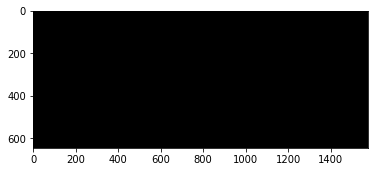

In [4]:
plt.imshow(blank_image)

## Canny Edges

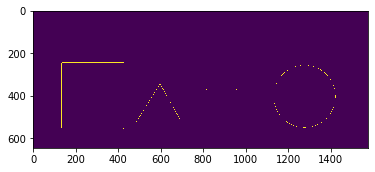

In [5]:
# Grayscale our image

gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Find Canny edges

edged = cv2.Canny(gray, 50, 200)

plt.imshow(edged)

## Draw All Contours On The Blank Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Number of contours found =  4


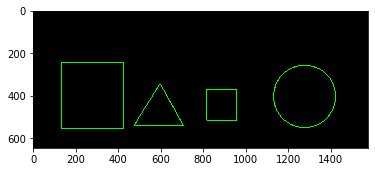

In [6]:
# Find contours and print how many were found

contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

print ("Number of contours found = ", len(contours))

cv2.drawContours(blank_image, contours, -1, (0,255,0), 3)

plt.imshow(blank_image)

## Draw Contours On Image

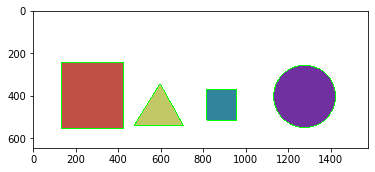

In [7]:
cv2.drawContours(image, contours, -1, (0,255,0), 3)

plt.imshow(image)

## Sorting By Area

In [8]:
def get_contour_areas(contours) :
    
    # returns the areas of all contours as list
    
    all_areas = []
    
    for cnt in contours :
        
        area = cv2.contourArea(cnt)
        
        all_areas.append(area)
        
    return all_areas

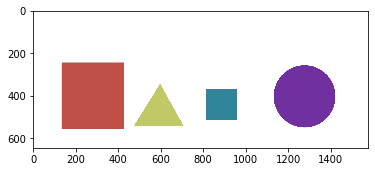

In [9]:
image = cv2.imread('./Section4Images/BunchOfShapes.jpg')

image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

orginal_image = image

plt.imshow(orginal_image)

## Area Of Contours Before Sorting

In [10]:
print(get_contour_areas(contours))

[20587.5, 22901.5, 66579.5, 90222.0]


## Sorting Areas From Large To Small

In [11]:
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

print(get_contour_areas(sorted_contours))

[90222.0, 66579.5, 22901.5, 20587.5]


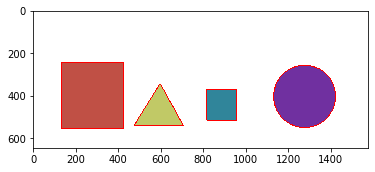

In [12]:
# Iterate over our contours and draw one at a time

for c in sorted_contours :
    
    cv2.drawContours(orginal_image, [c], -1, (255,0,0), 3)
    
    plt.imshow(orginal_image)

## Sorting By Position

In [13]:
# Functions we'll use for sorting by position

def x_cord_contour(contours) :
    
    if cv2.contourArea(contours) > 10 :
        
        M = cv2.moments(contours)
        
        return (int(M['m10']/M['m00']))
    
    else :
        
        pass

    
def label_contour_center(image, c) :
    
    M = cv2.moments(c)
    
    cx = int(M['m10'] / M['m00'])
    
    cy = int(M['m01'] / M['m00'])
 
    cv2.circle(image,(cx,cy), 10, (0,0,255), -1)
    
    return image

In [14]:
image = cv2.imread('./Section4Images/BunchOfShapes.jpg')

image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

## Center of Contours

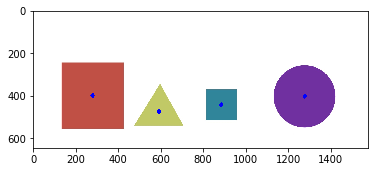

In [15]:
# Computer Center of Mass or centroids and draw them on our image

for (i, c) in enumerate(contours) :
    
    orig = label_contour_center(image, c)

plt.imshow(image)

In [16]:
# Sort by left to right using our x_cord_contour function

contours_left_to_right = sorted(contours, key = x_cord_contour, reverse = False)


# Labeling Contours left to right

for (i,c)  in enumerate(contours_left_to_right) :
    
    cv2.drawContours(orginal_image, [c], -1, (0,0,255), 3)  
    
    M = cv2.moments(c)
    
    cx = int(M['m10'] / M['m00'])
    
    cy = int(M['m01'] / M['m00'])
    
    cv2.putText(orginal_image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    cv2.imshow('Left to Right Contour', orginal_image)
    
    cv2.waitKey(0)
    
    (x, y, w, h) = cv2.boundingRect(c)  
    
    # Let's now crop each contour and save these images
    
    cropped_contour = orginal_image[y:y + h, x:x + w]
    
    image_name = "./Section4Images/output_shape_number_" + str(i+1) + ".jpg"
    
    print(image_name)
    
    cv2.imwrite(image_name, cropped_contour)
    
cv2.destroyAllWindows()

./Section4Images/output_shape_number_1.jpg
./Section4Images/output_shape_number_2.jpg
./Section4Images/output_shape_number_3.jpg
./Section4Images/output_shape_number_4.jpg
